In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
match_events= pd.read_csv('/Users/tsovinarbabakhanyan/Desktop/TunisiaLocalChapter_UEFAEURO2024/Datasets/match_events.csv')

In [200]:
match_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   matchid              6136 non-null   int64  
 1   hometeamname         6136 non-null   object 
 2   awayteamname         6136 non-null   object 
 3   event                6136 non-null   object 
 4   minute               6136 non-null   int64  
 5   phase                6136 non-null   int64  
 6   injuryminute         6136 non-null   int64  
 7   teamfromid           5797 non-null   float64
 8   teamtoid             1603 non-null   float64
 9   playerfromid         5791 non-null   float64
 10  playertoid           1592 non-null   float64
 11  time                 6136 non-null   object 
 12  matcheventattribute  93 non-null     object 
dtypes: float64(4), int64(4), object(5)
memory usage: 623.3+ KB


In [201]:
match_events.head()

,matchid,hometeamname,awayteamname,event,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid,time,matcheventattribute
0,2024442,Austria,North Macedonia,StartFirstHalf,0,1,0,NaN,NaN,NaN,NaN,2021-06-13T16:00:20.217,NaN
1,2024442,Austria,North Macedonia,Foul,4,1,0,59205.0,8.0,250039878.0,250003976.0,2021-06-13T16:03:45.897,NaN
2,2024442,Austria,North Macedonia,FreeKick,4,1,0,8.0,NaN,1909713.0,NaN,2021-06-13T16:03:56.853,NaN
3,2024442,Austria,North Macedonia,Foul,5,1,0,59205.0,8.0,250004363.0,101177.0,2021-06-13T16:04:44.217,NaN
4,2024442,Austria,North Macedonia,FreeKick,5,1,0,8.0,NaN,250065408.0,NaN,2021-06-13T16:04:54.533,NaN


In [202]:
categorical_col = ['hometeamname','awayteamname','event','time','matcheventattribute']

In [203]:
match_events = match_events.drop(columns=categorical_col)

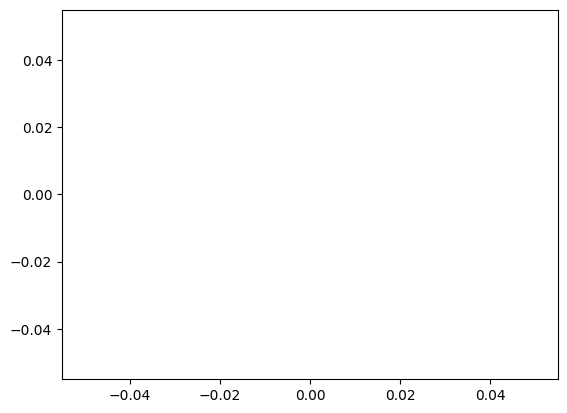

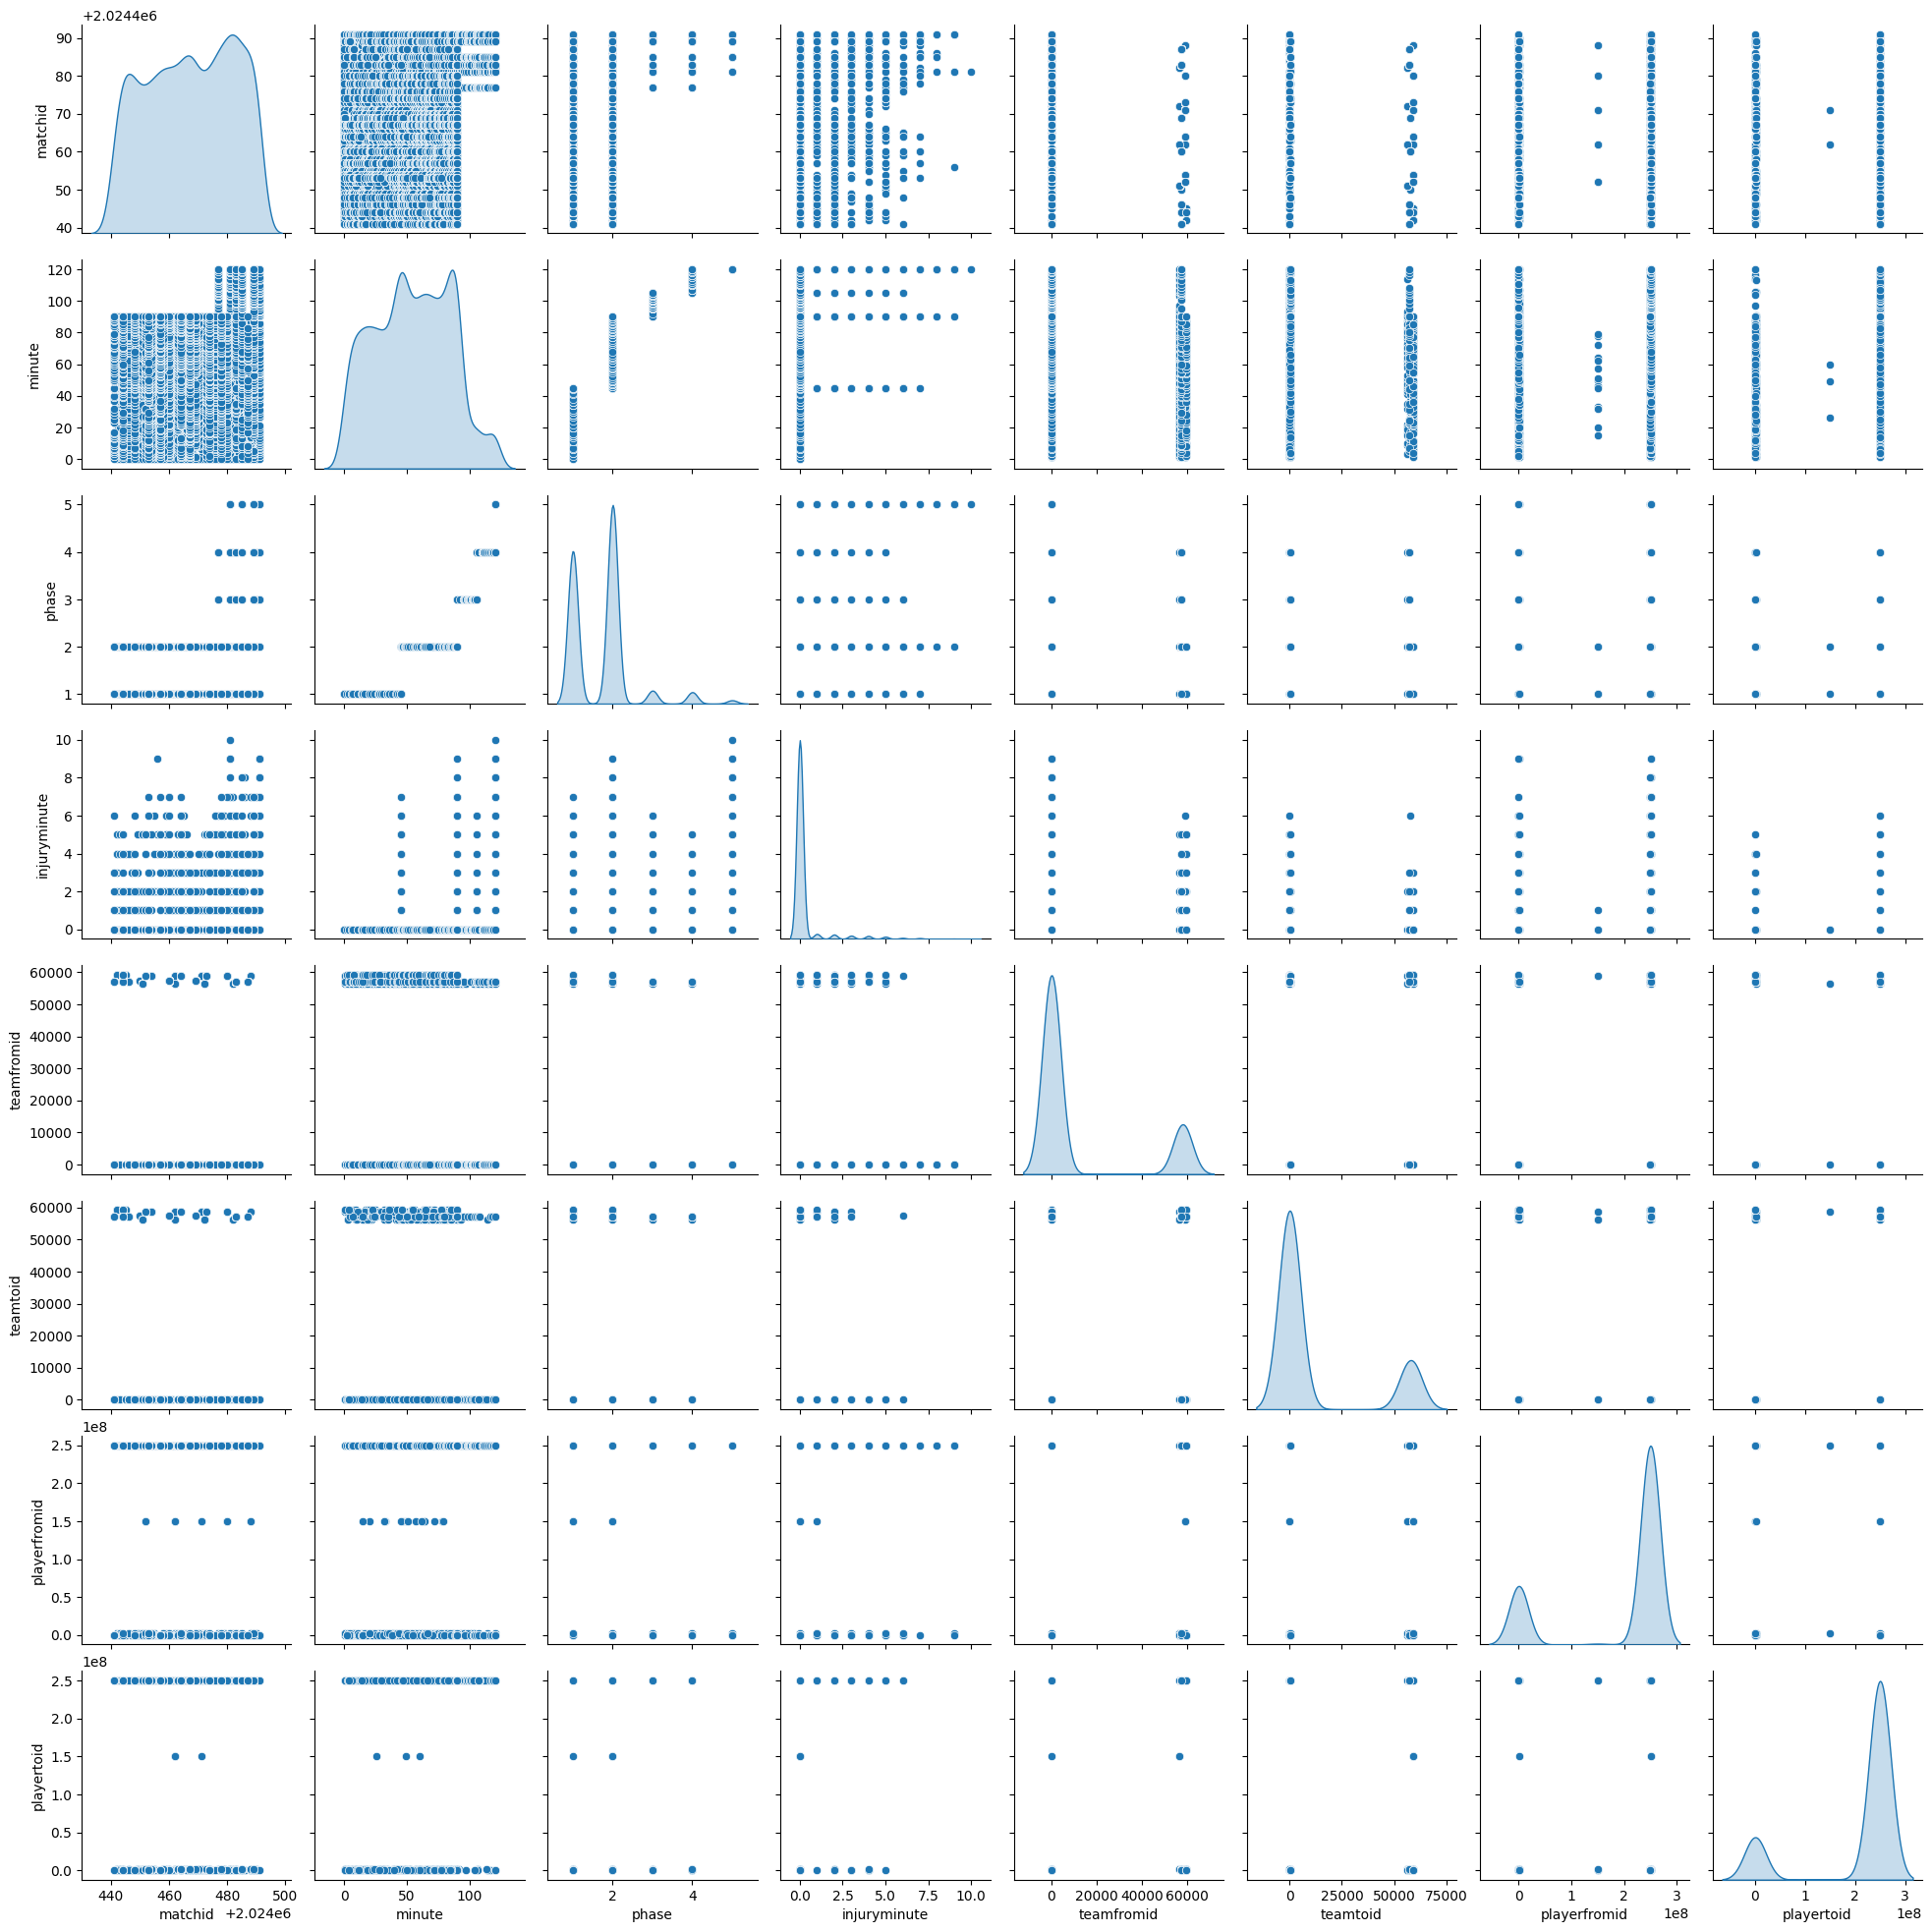

In [204]:
plt.plot(figsize=(16,6))
sns.pairplot(data=match_events,diag_kind='kde')

In [205]:
match_events = match_events.dropna()

In [206]:
X = match_events.drop('injuryminute',axis=1)
Y = match_events['injuryminute']

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [208]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, random_state = 0)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)


In [209]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [222]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=100)
log.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [223]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,Y_train)

LinearSVC()

In [224]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [226]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [227]:
from sklearn.metrics import classification_report

In [228]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(Y_test,preds))

NB MODEL
              precision    recall  f1-score   support

           0       0.95      0.12      0.21       454
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.12       478
   macro avg       0.14      0.02      0.03       478
weighted avg       0.90      0.12      0.20       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

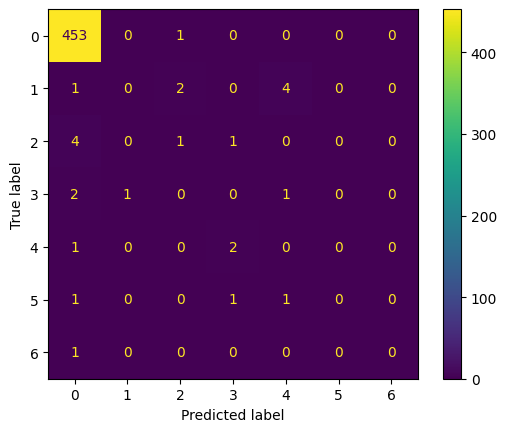

In [229]:
print("NB MODEL")
report(nb)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       454
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95       478
   macro avg       0.14      0.14      0.14       478
weighted avg       0.90      0.95      0.93       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

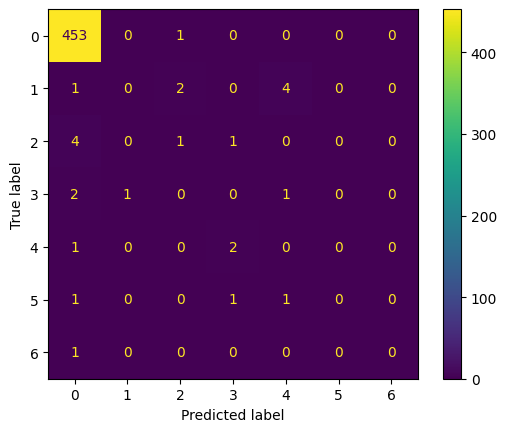

In [230]:
print("Logistic Regression")
report(log)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

SVC
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       454
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95       478
   macro avg       0.14      0.14      0.14       478
weighted avg       0.90      0.95      0.93       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

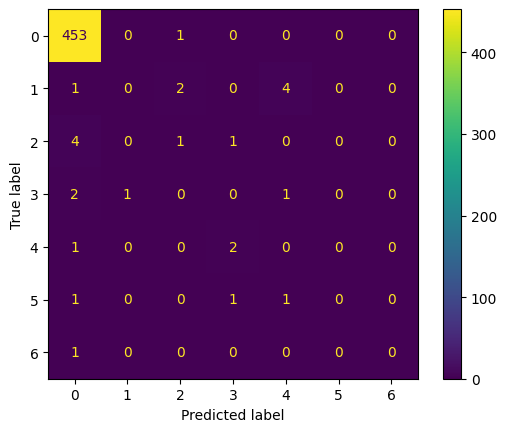

In [231]:
print("SVC")
report(svc)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       454
           1       0.00      0.00      0.00         7
           2       0.25      0.17      0.20         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95       478
   macro avg       0.18      0.17      0.17       478
weighted avg       0.93      0.95      0.94       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

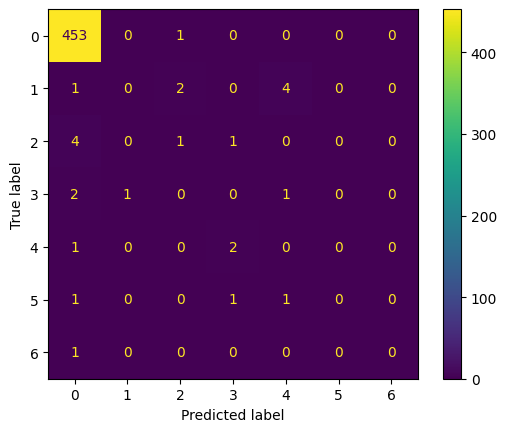

In [232]:
print("Random Forest")
report(classifier)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

Decition tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       454
           1       0.14      0.14      0.14         7
           2       0.17      0.17      0.17         6
           3       0.00      0.00      0.00         4
           4       0.14      0.33      0.20         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.94       478
   macro avg       0.21      0.23      0.21       478
weighted avg       0.94      0.94      0.94       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

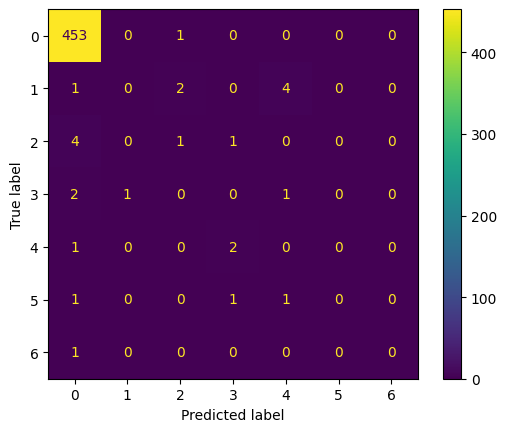

In [233]:
print("Decition tree")
report(clf)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

[Text(0.38741028708133973, 0.9666666666666667, 'x[1] <= 89.5\ngini = 0.111\nsamples = 1114\nvalue = [1050, 22, 17, 10, 11, 3, 1]'),
 Text(0.09569377990430622, 0.9, 'x[1] <= 45.5\ngini = 0.022\nsamples = 979\nvalue = [968, 8, 2, 0, 0, 0, 1]'),
 Text(0.24155203349282298, 0.9333333333333333, 'True  '),
 Text(0.07655502392344497, 0.8333333333333334, 'x[1] <= 44.5\ngini = 0.057\nsamples = 375\nvalue = [364, 8, 2, 0, 0, 0, 1]'),
 Text(0.05741626794258373, 0.7666666666666667, 'gini = 0.0\nsamples = 357\nvalue = [357, 0, 0, 0, 0, 0, 0]'),
 Text(0.09569377990430622, 0.7666666666666667, 'x[5] <= 250082392.0\ngini = 0.636\nsamples = 18\nvalue = [7, 8, 2, 0, 0, 0, 1]'),
 Text(0.07655502392344497, 0.7, 'x[6] <= 250042696.0\ngini = 0.622\nsamples = 15\nvalue = [4, 8, 2, 0, 0, 0, 1]'),
 Text(0.05741626794258373, 0.6333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0, 0]'),
 Text(0.09569377990430622, 0.6333333333333333, 'x[6] <= 250112912.0\ngini = 0.568\nsamples = 13\nvalue = [2, 8, 

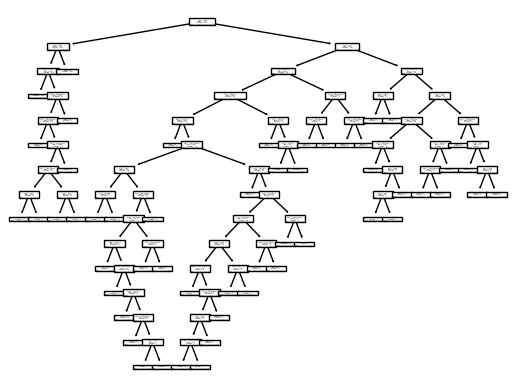

In [234]:
tree.plot_tree(clf)

In [236]:
test_predictions = linreg.predict(X_test)

In [237]:
test_predictions

array([ 0.40169436,  0.39984985,  0.47546113,  0.25903146, -0.02257469,
        0.29735337,  0.23638604, -0.07552148,  0.20733835,  0.28218519,
        0.10783264,  0.36658681, -0.07121676,  0.14108242,  0.03032711,
        0.36296659,  0.24560091, -0.10827815,  0.01560209, -0.03284408,
       -0.0299218 ,  0.36138582, -0.03011666,  0.17905987,  0.17571038,
       -0.06536598,  0.29701867,  0.21629233, -0.14217331,  0.43791896,
        0.1823416 , -0.16829178,  0.03958036,  0.03875123,  0.41085079,
        0.07122904,  0.17904882,  0.24699479,  0.34232207,  0.20639478,
        0.40440348,  0.37760745,  0.14961751, -0.00337531,  0.37584645,
        0.13574137, -0.17048351,  0.17628278,  0.40218633,  0.19099585,
        0.21253657,  0.46618547, -0.24223925,  0.19515293,  0.12179192,
        0.19542911,  0.29164827,  0.36019777, -0.03782004,  0.14066064,
        0.06769517, -0.08210138,  0.34595491,  0.34395563,  0.39501843,
        0.45352604,  0.42037827,  0.12059305,  0.13984485, -0.14

In [239]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [241]:
MAE = mean_absolute_error(Y_test,test_predictions)
MSE = mean_squared_error(Y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [242]:
MAE

0.2938508211993354

In [243]:
MSE

0.41531452681399683

In [244]:
RMSE

0.6444490102513906

In [246]:
match_events

,matchid,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid
1,2024442,4,1,0,59205.0,8.0,250039878.0,250003976.0
3,2024442,5,1,0,59205.0,8.0,250004363.0,101177.0
5,2024442,8,1,0,8.0,59205.0,250089289.0,250064634.0
11,2024442,16,1,0,59205.0,8.0,250031588.0,250024349.0
13,2024442,17,1,0,8.0,59205.0,250024349.0,250064634.0
...,...,...,...,...,...,...,...,...
6105,2024448,79,2,0,128.0,144.0,250023097.0,250112383.0
6108,2024448,80,2,0,144.0,128.0,102225.0,250064274.0
6114,2024448,83,2,0,128.0,144.0,250079677.0,250012942.0
6115,2024448,84,2,0,128.0,128.0,250002548.0,102130.0


In [247]:
match_events.corr()

,matchid,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid
matchid,1.000000,0.129937,0.186546,0.046549,-0.151619,-0.193345,0.045861,0.085036
minute,0.129937,1.000000,0.853078,0.208231,-0.014231,-0.014803,-0.006003,0.079648
phase,0.186546,0.853078,1.000000,0.065980,-0.024397,-0.020527,0.017667,0.070099
injuryminute,0.046549,0.208231,0.065980,1.000000,-0.000408,-0.037277,0.006175,0.002363
teamfromid,-0.151619,-0.014231,-0.024397,-0.000408,1.000000,0.259638,-0.053734,-0.030398
teamtoid,-0.193345,-0.014803,-0.020527,-0.037277,0.259638,1.000000,-0.029140,-0.011033
playerfromid,0.045861,-0.006003,0.017667,0.006175,-0.053734,-0.029140,1.000000,-0.002425
playertoid,0.085036,0.079648,0.070099,0.002363,-0.030398,-0.011033,-0.002425,1.000000
